# Probability distributions

Real-world processes carry **uncertainty** and one way to model this is with **probability distributions**.
We'll look at a few common probability distributions and their associated **random variables** as applied to engineering scenarios.

## Summary of commands

In this exercise, we will demonstrate the following:

- [**SciPy**](https://docs.scipy.org/doc//scipy/index.html), specifically the [**statistics**](https://docs.scipy.org/doc//scipy/tutorial/stats.html) package.
  - [`scipy.stats.binom`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html) - Binomial discrete random variable.
  - [`scipy.stats.poisson`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) - Poisson discrete random variable.
  - [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) - Normal continuous random variable.
- [`np.linspace(start, stop, num)`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) - Returns `num` evenly spaced numbers between `start` and `stop` (inclusive).

One of the nice things about using a well-written package like `scipy.stats` is that each of these sub-packages has standardized functions (see docs for specific input parameters):
- `rvs()` to generate **random variables**. Remember this term just refers to an object that can take on a specific value from a random process (sampled from a given distribution).
- `pmf()` or `pdf()` to calculate the **probability mass function** or **probability density function**, respectively.
- `cdf()` to calculate the **cumulative distribution function**.
- `ppf()` to calculate the **percent point function**, which is the inverse of the CDF.

## Demo

### Part (a)

A single lot containing $1000$ chips manufactured by a semiconductor company is known to contain $1\%$ of defective parts.
What is the probability that $10$ parts are defective in the lot?
Use both the binominal and the Poisson distributions to obtain the answer.

In [5]:
# import packages from SciPy library
from scipy.stats import binom, poisson

# constants
N = 1000
p = 0.01
thresh = 10

# binomial distribution
p1 = binom.pmf(thresh, N, p)
print(f"Binomial probability: {p1:.4f}")

# Poisson distribution
p2 = poisson.pmf(thresh, p*N)
print(f"Poisson probability: {p2:.4f}")

Binomial probability: 0.1257
Poisson probability: 0.1251


Note in the Poisson example we used the fact that $\mu = pN = \lambda$ for a Poisson distribution.
The similarity of the two answers demonstrates the convergence of the binomial distribution to the Poisson distribution when $N$ is large and $p$ is small (but non-zero).

### Part (b)

The diameters of shafts manufactured by an automotive company are normally distributed with the mean value of $1$ inch and the standard deviation of $0.01$ in.
Each shaft is to be mounted into a bearing with an inner diameter of $1.025$ in.
Write a script to estimate the proportion of defective parts out of $10,000$, i.e., the fraction of all parts that do not fit into the bearings.
On the same set of axes plot a histogram showing the observed frequencies of the shaft diameters and the scaled density function.

Probability: 0.0064


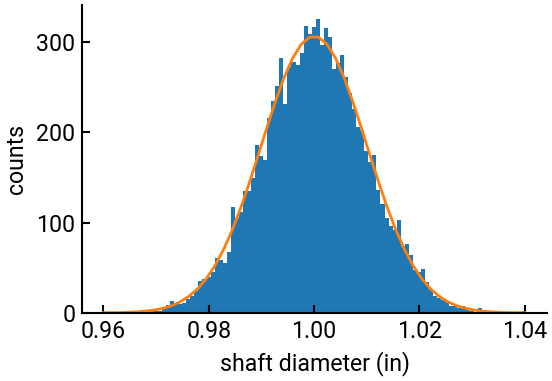

In [20]:
# import packages from SciPy library
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# constants
N = 10000
mu = 1
sd = 0.01
thresh = 1.025

# normal distribution sampling
shafts = norm.rvs(mu, sd, N, random_state=1)   # random_state is equiv to seed for consistency
defect = sum(shafts > thresh)
print(f"Probability: {defect/N:.4f}")

# normal distribution pdf
x = np.linspace(0.96, 1.04)
y = norm.pdf(x, mu, sd)

# make the plot
fig, ax = plt.subplots()
n, b, p = ax.hist(shafts, bins=100)     # grab all three outputs: bin heights, bin positions, bin artists
ax.plot(x, y * N * (b[1]-b[0]), lw=2)   # scale the normal dist. by N * bin_width
ax.set(xlabel=r"shaft diameter (in)", ylabel='counts')
plt.show()

Alternatively you can use the random number generator from NumPy to [sample from a normal distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html).
To get the scaled density function, we use the PDF of the normal distribution:

$$ f(x) = \dfrac{1}{\sqrt{2\pi \sigma^2}} \exp \left( -\dfrac{(x - \mu)^2}{2 \sigma^2} \right) $$

Probability: 0.0067


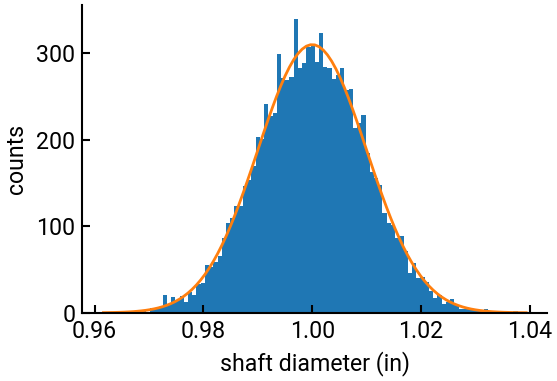

In [25]:
# import packages
import numpy as np
rng = np.random.default_rng(seed=1)

# constants
N = 10000
mu = 1
sd = 0.01
thresh = 1.025

# normal distribution
shafts = rng.normal(mu, sd, N)
defect = np.sum(shafts > thresh)
print(f"Probability: {defect/N:.4f}")

# make the plot
fig, ax = plt.subplots()
n, b, p = ax.hist(shafts, bins=100)
y = 1 / (sd * np.sqrt(2 * np.pi)) * np.exp(-(b - mu)**2 / (2 * sd**2) ) * N * (b[1] - b[0])   # hack to use bin positions instead of creating new vector
ax.plot(b, y, lw=2)
ax.set(xlabel=r"shaft diameter (in)", ylabel='counts')
plt.show()